In [172]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from tqdm import tqdm  #### loop 
import plotly
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.neighbors import KernelDensity
from scipy.stats import norm, gaussian_kde
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [221]:
def pnl_plot(dist): 
    p=np.percentile (dist,5) #95% percentail - lower bound
    kde = stats.gaussian_kde(dist)
    # plot complete kde curve as line
    pos = np.linspace(dist.min(), dist.max(), 101)
    plt.plot(pos, kde(pos))
    # plot shaded kde only 95% percentile
    shade = np.linspace(dist.min(),p,101)
    plt.fill_between(shade,kde(shade), alpha=0.5)


In [240]:
def pnl_summary(dist):
    Mean = np.mean(dist)
    std = np.std(dist)
    VaR = np.percentile(dist,5)
    CVaR = np.mean(dist[dist<VaR])
    skewness=stats.skew(dist, bias=False)
    kurt = stats.kurtosis(dist, bias=False)
    print('Mean=%0.5f, Std=%0.5f, VaR=%0.5f, CVaR=%0.5f, skewness=%0.5f, kurtosis=%0.5f' %
         (Mean,std,VaR,CVaR,skewness,kurt))


# Foundations of Option Price and Greeks

In [4]:
def f_call(K, tau, x, r, sigma): 
    dp = (np.log(x/K) + (r+0.5*sigma**2)*tau)/(sigma*np.sqrt(tau))
    dm = (np.log(x/K) + (r-0.5*sigma**2)*tau)/(sigma*np.sqrt(tau))
    
    return x*norm.cdf(dp) - K*np.exp(-r*tau)*norm.cdf(dm)

def f_put(K, tau, x, r, sigma): 
    dp = (np.log(x/K) + (r+0.5*sigma**2)*tau)/(sigma*np.sqrt(tau))
    dm = (np.log(x/K) + (r-0.5*sigma**2)*tau)/(sigma*np.sqrt(tau))
    
    return K*np.exp(-r*tau)*norm.cdf(-dm)-x*norm.cdf(-dp)

In [5]:
def delta_call (K, tau, x, r, sigma): 
    d1 = 1/(sigma*np.sqrt(tau))* (np.log(x/K)+(r+0.5*sigma**2)*tau)
    phi = norm.cdf(d1)
    
    return phi # call delta

def delta_put (K, tau, x, r, sigma): 
    d1 = 1/(sigma*np.sqrt(tau))* (np.log(x/K)+(r+0.5*sigma**2)*tau)
    phi = norm.cdf(d1)
    
    return phi-1 # put delta

In [6]:
def gamma (K, tau, x, r, sigma):
    d1 = 1/(sigma*np.sqrt(tau))* (np.log(x/K)+(r+0.5*sigma**2)*tau)
    gamma = norm.pdf(d1)/(x*sigma*np.sqrt(tau))
    
    return gamma # gamma call = gamma put

Input Settings:

In [247]:
x=np.linspace(60,140,1000) # asset price
s0 = 100 # initial asset price
mu = 0.1 # real world drift
K = 100 #strike
sigma = 0.2 #volatility
r = 0.02 # risk-free rate
tau = 0.25 #time to maturity - put
tau_call=0.5 #time to maturity - call
fee1 = 0.005 # equity transaction cost per unit
fee2 = 0.01 # option transaction cost per unit
band = 0.05

Option price

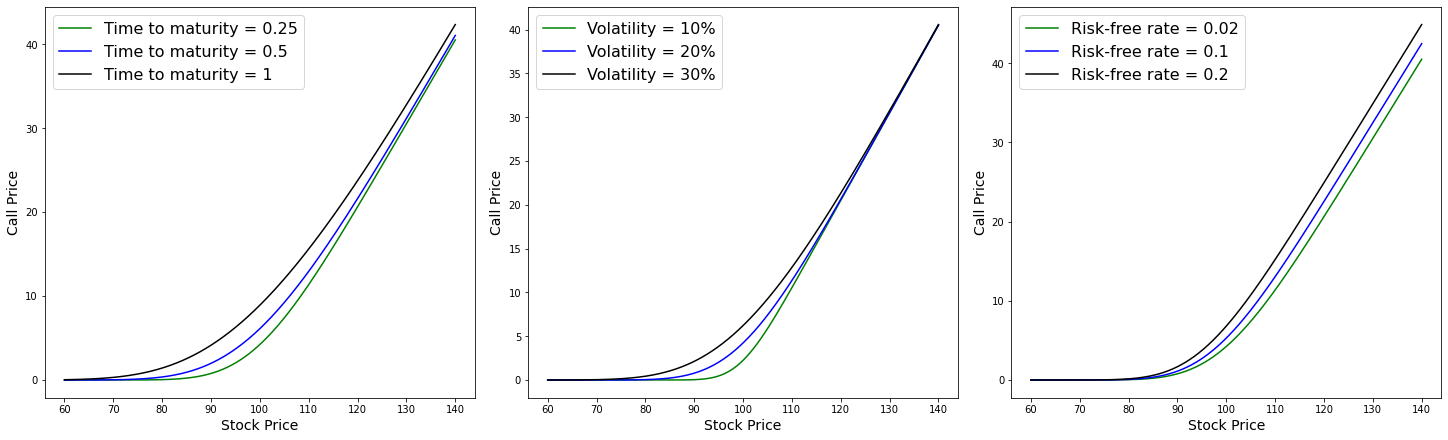

In [122]:
fig1, f1_axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True,figsize=(20,6))
f1_axes[0].plot(x,f_call(K, tau, x, r, sigma),color='g',label='Time to maturity = 0.25')
f1_axes[0].plot(x,f_call(K, 2*tau, x, r, sigma),color='b',label='Time to maturity = 0.5')
f1_axes[0].plot(x,f_call(K, 4*tau, x, r, sigma),color='k',label='Time to maturity = 1')
f1_axes[0].legend(prop={'size': 16})
f1_axes[0].set_ylabel('Call Price', fontsize=14)
f1_axes[0].set_xlabel('Stock Price', fontsize=14)

f1_axes[1].plot(x,f_call(K, tau, x, r, 0.5*sigma),color='g',label='Volatility = 10%')
f1_axes[1].plot(x,f_call(K, tau, x, r, sigma),color='b',label='Volatility = 20%')
f1_axes[1].plot(x,f_call(K, tau, x, r, 1.5*sigma),color='k',label='Volatility = 30%')
f1_axes[1].legend(prop={'size': 16})
f1_axes[1].set_ylabel('Call Price', fontsize=14)
f1_axes[1].set_xlabel('Stock Price', fontsize=14)

f1_axes[2].plot(x,f_call(K, tau, x, r, sigma),color='g',label='Risk-free rate = 0.02')
f1_axes[2].plot(x,f_call(K, tau, x, 5*r, sigma),color='b',label='Risk-free rate = 0.1')
f1_axes[2].plot(x,f_call(K, tau, x, 10*r, sigma),color='k',label='Risk-free rate = 0.2')
f1_axes[2].legend(prop={'size': 16})
f1_axes[2].set_ylabel('Call Price', fontsize=14)
f1_axes[2].set_xlabel('Stock Price', fontsize=14)

plt.savefig('Call Price.png')

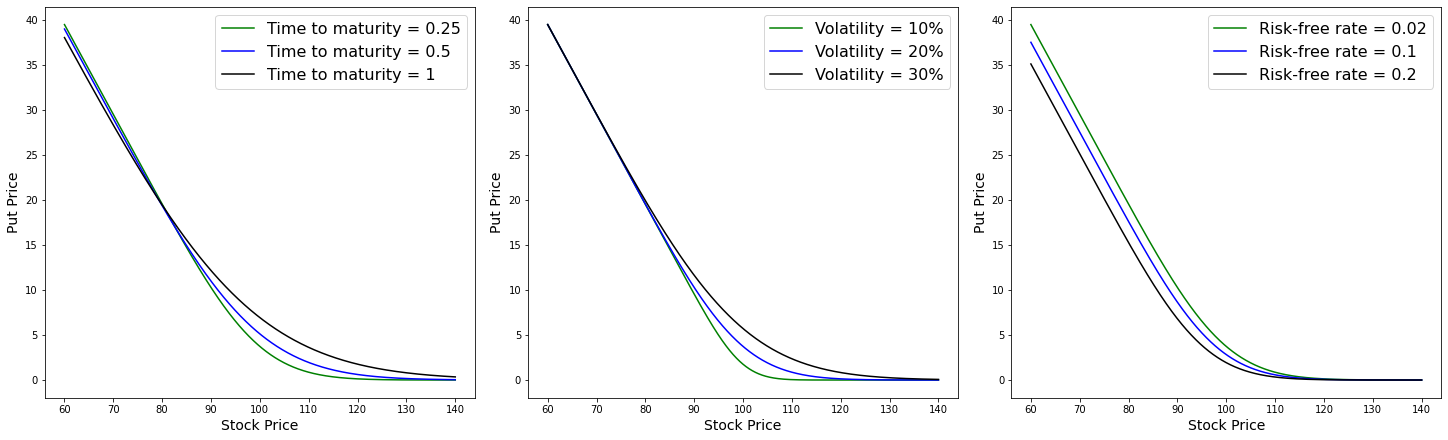

In [123]:
fig2, f2_axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True,figsize=(20,6))
f2_axes[0].plot(x,f_put(K, tau, x, r, sigma),color='g',label='Time to maturity = 0.25')
f2_axes[0].plot(x,f_put(K, 2*tau, x, r, sigma),color='b',label='Time to maturity = 0.5')
f2_axes[0].plot(x,f_put(K, 4*tau, x, r, sigma),color='k',label='Time to maturity = 1')
f2_axes[0].legend(prop={'size': 16})
f2_axes[0].set_ylabel('Put Price', fontsize=14)
f2_axes[0].set_xlabel('Stock Price', fontsize=14)

f2_axes[1].plot(x,f_put(K, tau, x, r, 0.5*sigma),color='g',label='Volatility = 10%')
f2_axes[1].plot(x,f_put(K, tau, x, r, sigma),color='b',label='Volatility = 20%')
f2_axes[1].plot(x,f_put(K, tau, x, r, 1.5*sigma),color='k',label='Volatility = 30%')
f2_axes[1].legend(prop={'size': 16})
f2_axes[1].set_ylabel('Put Price', fontsize=14)
f2_axes[1].set_xlabel('Stock Price', fontsize=14)

f2_axes[2].plot(x,f_put(K, tau, x, r, sigma),color='g',label='Risk-free rate = 0.02')
f2_axes[2].plot(x,f_put(K, tau, x, 5*r, sigma),color='b',label='Risk-free rate = 0.1')
f2_axes[2].plot(x,f_put(K, tau, x, 10*r, sigma),color='k',label='Risk-free rate = 0.2')
f2_axes[2].legend(prop={'size': 16})
f2_axes[2].set_ylabel('Put Price', fontsize=14)
f2_axes[2].set_xlabel('Stock Price', fontsize=14)

plt.savefig('Put Price.png')

Option delta

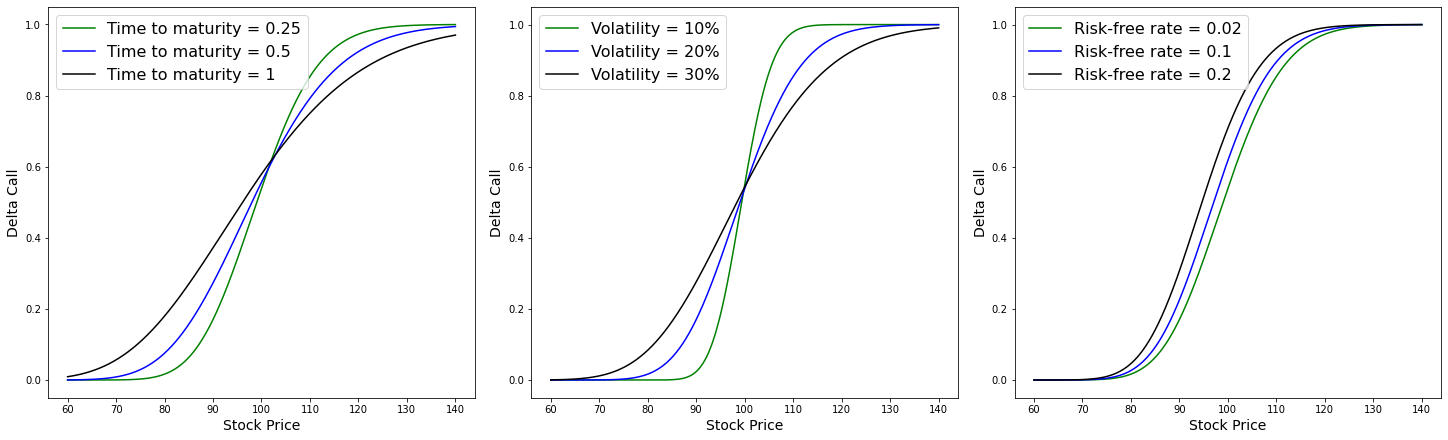

In [124]:
fig2, f2_axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True,figsize=(20,6))
f2_axes[0].plot(x,delta_call(K, tau, x, r, sigma),color='g',label='Time to maturity = 0.25')
f2_axes[0].plot(x,delta_call(K, 2*tau, x, r, sigma),color='b',label='Time to maturity = 0.5')
f2_axes[0].plot(x,delta_call(K, 4*tau, x, r, sigma),color='k',label='Time to maturity = 1')
f2_axes[0].legend(loc=2,prop={'size': 16})
f2_axes[0].set_ylabel('Delta Call', fontsize=14)
f2_axes[0].set_xlabel('Stock Price', fontsize=14)

f2_axes[1].plot(x,delta_call(K, tau, x, r, 0.5*sigma),color='g',label='Volatility = 10%')
f2_axes[1].plot(x,delta_call(K, tau, x, r, sigma),color='b',label='Volatility = 20%')
f2_axes[1].plot(x,delta_call(K, tau, x, r, 1.5*sigma),color='k',label='Volatility = 30%')
f2_axes[1].legend(loc=2,prop={'size': 16})
f2_axes[1].set_ylabel('Delta Call', fontsize=14)
f2_axes[1].set_xlabel('Stock Price', fontsize=14)

f2_axes[2].plot(x,delta_call(K, tau, x, r, sigma),color='g',label='Risk-free rate = 0.02')
f2_axes[2].plot(x,delta_call(K, tau, x, 5*r, sigma),color='b',label='Risk-free rate = 0.1')
f2_axes[2].plot(x,delta_call(K, tau, x, 10*r, sigma),color='k',label='Risk-free rate = 0.2')
f2_axes[2].legend(loc=2,prop={'size': 16})
f2_axes[2].set_ylabel('Delta Call', fontsize=14)
f2_axes[2].set_xlabel('Stock Price', fontsize=14)

plt.savefig('Delta Call.png')

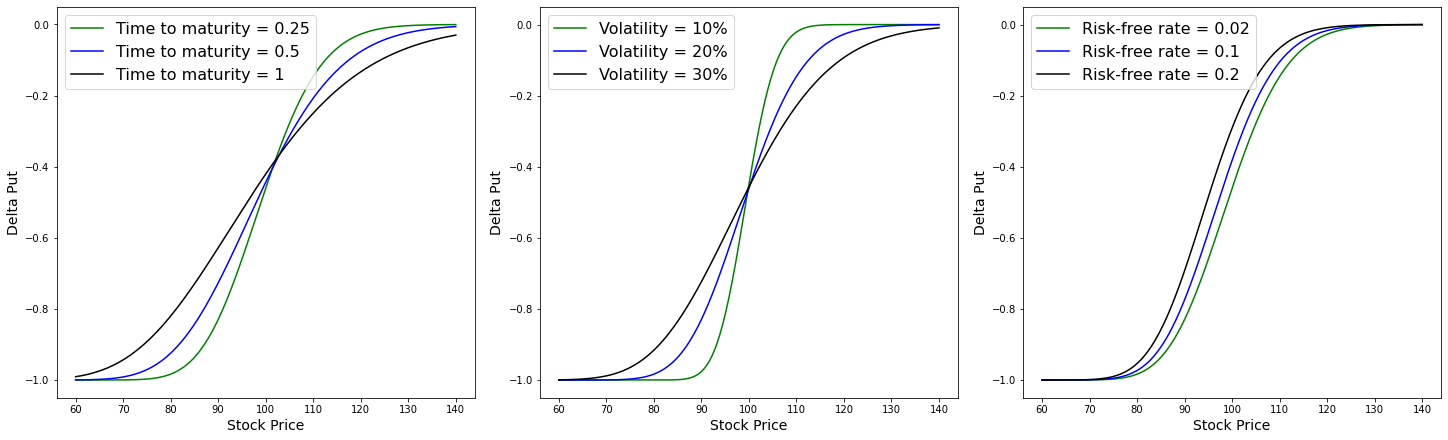

In [125]:
fig2, f2_axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True,figsize=(20,6))
f2_axes[0].plot(x,delta_put(K, tau, x, r, sigma),color='g',label='Time to maturity = 0.25')
f2_axes[0].plot(x,delta_put(K, 2*tau, x, r, sigma),color='b',label='Time to maturity = 0.5')
f2_axes[0].plot(x,delta_put(K, 4*tau, x, r, sigma),color='k',label='Time to maturity = 1')
f2_axes[0].legend(loc=2,prop={'size': 16})
f2_axes[0].set_ylabel('Delta Put', fontsize=14)
f2_axes[0].set_xlabel('Stock Price', fontsize=14)

f2_axes[1].plot(x,delta_put(K, tau, x, r, 0.5*sigma),color='g',label='Volatility = 10%')
f2_axes[1].plot(x,delta_put(K, tau, x, r, sigma),color='b',label='Volatility = 20%')
f2_axes[1].plot(x,delta_put(K, tau, x, r, 1.5*sigma),color='k',label='Volatility = 30%')
f2_axes[1].legend(loc=2,prop={'size': 16})
f2_axes[1].set_ylabel('Delta Put', fontsize=14)
f2_axes[1].set_xlabel('Stock Price', fontsize=14)

f2_axes[2].plot(x,delta_put(K, tau, x, r, sigma),color='g',label='Risk-free rate = 0.02')
f2_axes[2].plot(x,delta_put(K, tau, x, 5*r, sigma),color='b',label='Risk-free rate = 0.1')
f2_axes[2].plot(x,delta_put(K, tau, x, 10*r, sigma),color='k',label='Risk-free rate = 0.2')
f2_axes[2].legend(loc=2,prop={'size': 16})
f2_axes[2].set_ylabel('Delta Put', fontsize=14)
f2_axes[2].set_xlabel('Stock Price', fontsize=14)

plt.savefig('Delta Put.png')

Option gamma

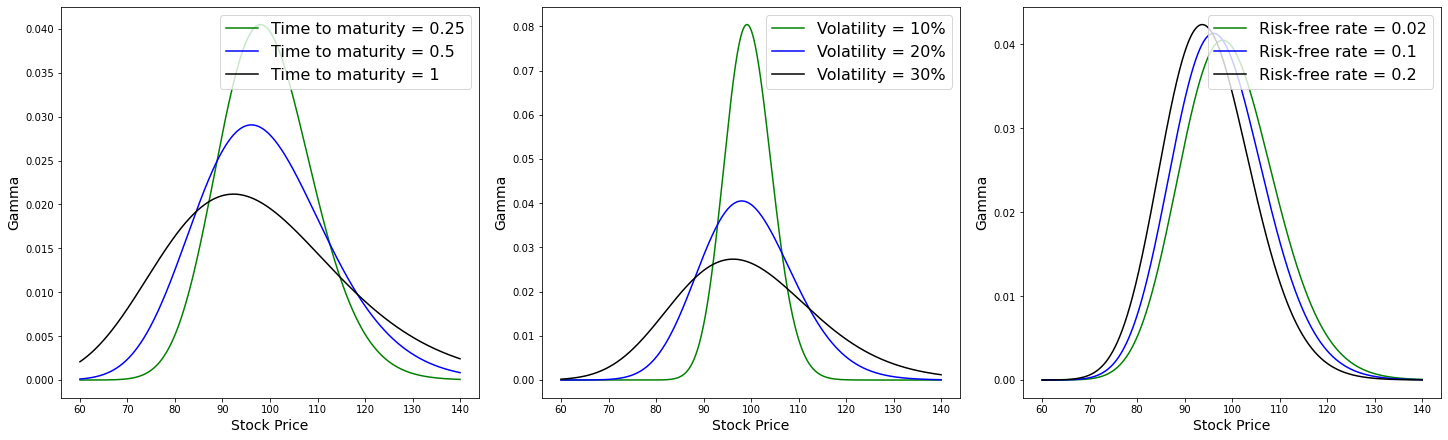

In [127]:
# put and call gamma
# change tau, sigma, r
fig2, f2_axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True,figsize=(20,6))
f2_axes[0].plot(x,gamma(K, tau, x, r, sigma),color='g',label='Time to maturity = 0.25')
f2_axes[0].plot(x,gamma(K, 2*tau, x, r, sigma),color='b',label='Time to maturity = 0.5')
f2_axes[0].plot(x,gamma(K, 4*tau, x, r, sigma),color='k',label='Time to maturity = 1')
f2_axes[0].legend(loc=1,prop={'size': 16})
f2_axes[0].set_ylabel('Gamma', fontsize=14)
f2_axes[0].set_xlabel('Stock Price', fontsize=14)

f2_axes[1].plot(x,gamma(K, tau, x, r, 0.5*sigma),color='g',label='Volatility = 10%')
f2_axes[1].plot(x,gamma(K, tau, x, r, sigma),color='b',label='Volatility = 20%')
f2_axes[1].plot(x,gamma(K, tau, x, r, 1.5*sigma),color='k',label='Volatility = 30%')
f2_axes[1].legend(loc=1,prop={'size': 16})
f2_axes[1].set_ylabel('Gamma', fontsize=14)
f2_axes[1].set_xlabel('Stock Price', fontsize=14)

f2_axes[2].plot(x,gamma(K, tau, x, r, sigma),color='g',label='Risk-free rate = 0.02')
f2_axes[2].plot(x,gamma(K, tau, x, 5*r, sigma),color='b',label='Risk-free rate = 0.1')
f2_axes[2].plot(x,gamma(K, tau, x, 10*r, sigma),color='k',label='Risk-free rate = 0.2')
f2_axes[2].legend(loc=1,prop={'size': 16})
f2_axes[2].set_ylabel('Gamma', fontsize=14)
f2_axes[2].set_xlabel('Stock Price', fontsize=14)

plt.savefig('Gamma.png')

# Time-based Delta Hedging

In [282]:
def time_delta_hedging (rebal, K, tau, s0, r, sigma, mu, fee1,sigma_p=sigma):
    #vector
    P=np.zeros(rebal+1) #portflio value* 
    V=np.zeros(rebal+1) # opotion value 
    Alpha=np.zeros(rebal+1) # asset share number 
    B=np.zeros(rebal+1) # bank account* 
    S=np.zeros(rebal+1) #asset price* 
    Hold=np.zeros(rebal+1) # stock holding* 
    Cost=np.zeros(rebal+1) # transaction cost
    t=np.zeros(rebal+1) #time
    # initial values:
    P[0]=0
    S[0]= s0
    V[0]=f_put(K, tau, s0, r, sigma)
    Alpha[0]=delta_put(K, tau, s0, r, sigma)
    #Cost[0]=0
    Cost[0]=fee1*abs(Alpha[0])+fee2
    B[0]=V[0]-Alpha[0]*s0-Cost[0] # bank account = sell put option and long alpha_0 share of stocks
    Hold[0]=Alpha[0]*S[0]
    #Cost[0]=0
    t[0]=0
    # sigma_p =real world volatility of the asset path
    
    
    T=tau
    delt = T/rebal
    for i in np.arange(1,rebal+1):
        S[i]=S[i-1]*np.exp((mu-sigma_p**2/2)*delt+sigma_p*np.random.normal(0,1)*np.sqrt(delt))
        V[i]=f_put(K, T-(i-1)*delt, S[i], r, sigma)
        # no rebalancing at T, so simply liquidate portfolio 
        if i ==rebal+1:
            Alpha[i]=Alpha[i-1] 
        else:
            Alpha[i]=delta_put(K, T-(i-1)*delt, S[i], r, sigma)
        Hold[i]=Alpha[i]*S[i]
        Cost[i]= fee1*abs(Alpha[i]-Alpha[i-1]) # transaction cost of equity
        B[i]=np.exp(r*delt)*B[i-1]-S[i]*(Alpha[i]-Alpha[i-1])-Cost[i]
        P[i]=-V[i]+Alpha[i]*S[i]+B[i]
        
        t[i]=t[i-1]+delt
        
    #plot
    #fig, aix = plt.subplots(figsize=(12,6))
    #aix.plot(t, S, '-b', label='Stock price')
    #aix.plot(t, B, '--r', label='Bank account') 
    #aix.plot(t, Hold, '--g', label='Stock holding') 
    #aix.plot(t, P, '-', label='Portfolio value') 
    #aix.set_xlabel('time', fontsize=10)
    #aix.set_title ("Number of rebalancing = "+str(rebal)) 
    #leg = aix.legend(loc = 'best')
             
    #PnL = B[rebal]+Hold[rebal]-V[rebal]
    return P #PnL 

In [357]:
PnL = time_delta_hedging (1000, K, tau, s0, r, sigma, mu, fee1)

In [358]:
np.mean(PnL)

0.02247085195847774

In [275]:
# portfolio value at maturity
# test real world volatility
N_sim = 5000
profit9 = np.zeros(N_sim)
for i in np.arange (N_sim):
    profit9[i] = time_delta_hedging (100, K, tau, s0, r, sigma, mu, fee1,0.15)[100]


In [277]:
np.mean(profit9)

0.9407052882195905

In [134]:
np.mean(profit)

-0.18586170879713346

# Plot and Numerical summary - time delta

In [176]:
# portfolio value at maturity
N_sim = 5000
reb = 100
profit1 = np.zeros(N_sim)
profit2 = np.zeros(N_sim) #base case
profit3 = np.zeros(N_sim)
for i in np.arange (N_sim):
    # transaction cost
    profit1[i] = time_delta_hedging (reb, K, tau, s0, r, sigma, mu, 0)[reb]
    profit2[i] = time_delta_hedging (reb, K, tau, s0, r, sigma, mu, fee1)[reb] #base case fee1=0.005
    profit3[i] = time_delta_hedging (reb, K, tau, s0, r, sigma, mu, fee1*10)[reb]

In [191]:
N_sim = 5000
reb = 100
profit4 = np.zeros(N_sim)
#profit2 = np.zeros(N_sim) #base case fee1=0.005, sigma = 20%
profit5 = np.zeros(N_sim)
profit6 = np.zeros(N_sim)
profit7 = np.zeros(N_sim)
profit8 = np.zeros(N_sim)

for i in np.arange (N_sim):
    #time steps
    profit4[i] = time_delta_hedging (10, K, tau, s0, r, sigma, mu, fee1)[10]
    #profit2[i] = time_delta_hedging (reb, K, tau, s0, r, sigma, mu, fee1)[reb]
    profit5[i] = time_delta_hedging (300, K, tau, s0, r, sigma, mu, fee1)[300]
    #volatility
    profit6[i] = time_delta_hedging (reb, K, tau, s0, r, 0.1, mu, fee1)[reb]
    profit7[i] = time_delta_hedging (reb, K, tau, s0, r, 0.3, mu, fee1)[reb]
    profit8[i] = time_delta_hedging (reb, K, tau, s0, r, 0.4, mu, fee1)[reb]

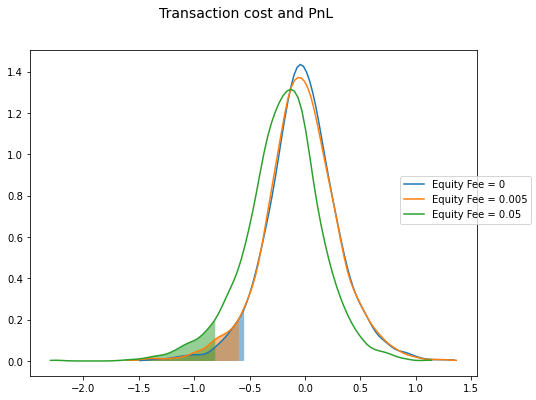

In [222]:
# Transaction cost and PnL - time delta
fig = plt.figure(figsize=(8,6))
pnl_plot(profit1)
pnl_plot(profit2)
pnl_plot(profit3)
fig.suptitle('Transaction cost and PnL', fontsize=14)
fig.legend(labels=['Equity Fee = 0','Equity Fee = 0.005','Equity Fee = 0.05'],loc='center right')

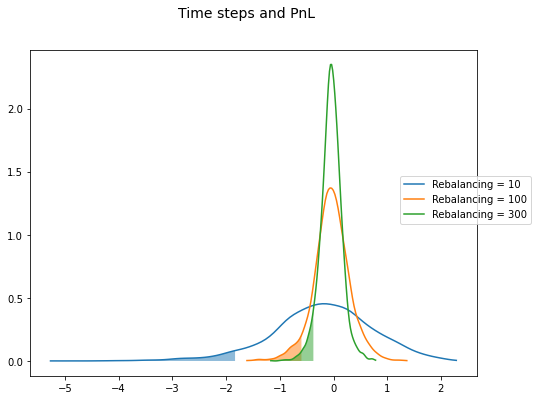

In [223]:
#time steps and PnL - time delta
fig = plt.figure(figsize=(8,6))
pnl_plot(profit4)
pnl_plot(profit2)
pnl_plot(profit5)
fig.suptitle('Time steps and PnL', fontsize=14)
fig.legend(labels=['Rebalancing = 10','Rebalancing = 100','Rebalancing = 300'],loc='center right')

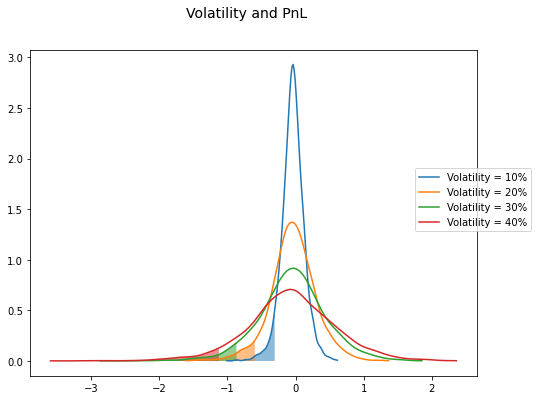

In [224]:
#volatility and PnL - time delta
fig = plt.figure(figsize=(8,6))
pnl_plot(profit6)
pnl_plot(profit2)
pnl_plot(profit7)
pnl_plot(profit8)
fig.suptitle('Volatility and PnL', fontsize=14)
fig.legend(labels=['Volatility = 10%','Volatility = 20%','Volatility = 30%','Volatility = 40%'],loc='center right')

In [241]:
#numerical summary
pnl_summary(profit1)
pnl_summary(profit2)
pnl_summary(profit3)
pnl_summary(profit4)
pnl_summary(profit5)
pnl_summary(profit6)
pnl_summary(profit7)
pnl_summary(profit8)


Mean=-0.02541, Std=0.32630, VaR=-0.54991, CVaR=-0.76176, skewness=-0.06017, kurtosis=1.32430
Mean=-0.03754, Std=0.33809, VaR=-0.59732, CVaR=-0.83007, skewness=-0.19685, kurtosis=1.44709
Mean=-0.20272, Std=0.34817, VaR=-0.81048, CVaR=-1.03867, skewness=-0.42435, kurtosis=1.56712
Mean=-0.20870, Std=0.93546, VaR=-1.83358, CVaR=-2.44585, skewness=-0.48557, kurtosis=0.96184
Mean=-0.04576, Std=0.19977, VaR=-0.37498, CVaR=-0.50554, skewness=-0.15714, kurtosis=1.61120
Mean=-0.04062, Std=0.16598, VaR=-0.30672, CVaR=-0.42972, skewness=-0.29221, kurtosis=1.91143
Mean=-0.04611, Std=0.50452, VaR=-0.86809, CVaR=-1.19475, skewness=-0.21100, kurtosis=1.33324
Mean=-0.06093, Std=0.65873, VaR=-1.12592, CVaR=-1.56654, skewness=-0.20614, kurtosis=1.38372


In [236]:
np.mean(profit1[profit1<-0.54991]) # test cvar

-0.7617554905431896

# Move-based Delta Hedging

In [361]:
def move_delta_hedging (rebal, K, tau, s0, r, sigma, mu, band, fee1,sigma_p=sigma):
    #vector
    P=np.zeros(rebal+1) #portflio value* 
    V=np.zeros(rebal+1) # opotion value 
    Alpha=np.zeros(rebal+1) # asset share number 
    B=np.zeros(rebal+1) # bank account* 
    S=np.zeros(rebal+1) #asset price* 
    Hold=np.zeros(rebal+1) # stock holding* 
    Cost=np.zeros(rebal+1) # transaction cost
    t=np.zeros(rebal+1) #time
    
    delta=np.zeros(rebal+1) #track delta
    delta[0]=delta_put(K, tau, s0, r, sigma)
    
    # initial values:
    P[0]=0 
    S[0]= s0
    V[0]=f_put(K, tau, s0, r, sigma)
    Alpha[0]=delta_put(K, tau, s0, r, sigma)
    ub = Alpha[0]+0.5*band
    lb = Alpha[0]-0.5*band
    Cost[0]=fee1*abs(Alpha[0])+fee2
    B[0]=V[0]-Alpha[0]*s0 -Cost[0] # bank account = sell put option and long alpha_0 share of stocks
    Hold[0]=Alpha[0]*S[0]
    t[0]=0
    
    T=tau
    delt = T/rebal
    for i in np.arange(1,rebal+1):
        S[i]=S[i-1]*np.exp((mu-sigma_p**2/2)*delt+sigma_p*np.random.normal(0,1)*np.sqrt(delt))
        V[i]=f_put(K, T-(i-1)*delt, S[i], r, sigma)
        # no rebalancing at T, so simply liquidate portfolio 
        if i ==rebal+1:
            Alpha[i]=Alpha[i-1] 
        else:
            #delta = delta_put (K, T-(i-1)*delt, S[i], r, sigma)
            delta[i] = delta_put (K, T-(i-1)*delt, S[i], r, sigma)
            #keep current position until the telta of option has changed significantly large
            #if delta<ub and delta>lb:
            if delta[i]<ub and delta[i]>lb:
                Alpha[i] = Alpha[i-1]
            else:
                #Alpha[i]= delta
                Alpha[i]= delta[i]
                #reset bound after rebalancing
                ub = Alpha[i]+0.5*band
                lb = Alpha[i]-0.5*band
        Hold[i]=Alpha[i]*S[i]
        Cost[i]= fee1*abs(Alpha[i]-Alpha[i-1]) # transaction cost of equity
        B[i]=np.exp(r*delt)*B[i-1]-S[i]*(Alpha[i]-Alpha[i-1])-Cost[i]
        P[i]=-V[i]+Alpha[i]*S[i]+B[i]
        
        t[i]=t[i-1]+delt
        
        #plot
    #fig, aix = plt.subplots(figsize=(12,6))
    #aix.plot(t, delta, '-b', label='Delta')
    #aix.plot(t, Alpha+0.5*band, '-r', label='Upper Bound')
    #aix.plot(t, Alpha-0.5*band, '--g', label='Lower Bound')
    
   #aix.plot(t, S, '-b', label='Stock price')
   #aix.plot(t, B, '--r', label='Bank account') 
   #aix.plot(t, Hold, '--g', label='Stock holding') 
   #aix.plot(t, P, '-', label='Portfolio value') 
    #aix.set_xlabel('time', fontsize=10)
    #aix.set_title ("Number of rebalancing = "+str(rebal)) 
    #aix.set_title ("Rebalancing Band for Delta (Time step = " +str(rebal)+", Band = "+str(band)+")")
    #leg = aix.legend(loc = 'best')    
   #PnL = B[rebal]+Hold[rebal]-V[rebal]
    return P #PnL 

In [362]:
PnL = move_delta_hedging (1000, K, tau, s0, r, sigma, mu, band, fee1)
np.mean(PnL)

-0.14464622004590916

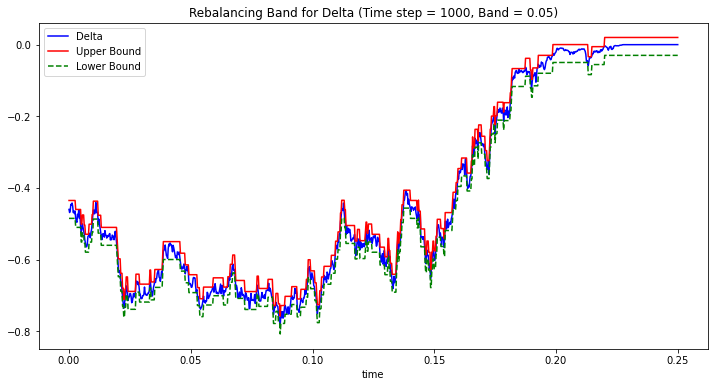

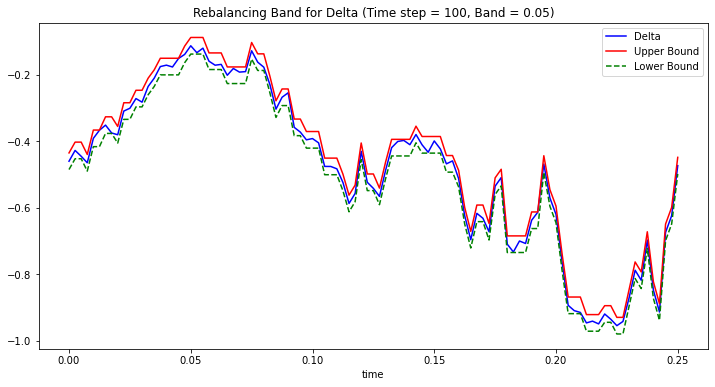

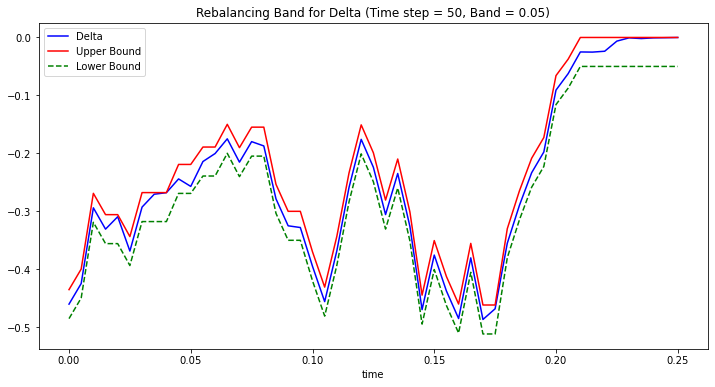

In [317]:
PnL = move_delta_hedging (1000, K, tau, s0, r, sigma, mu, band, fee1)
PnL = move_delta_hedging (100, K, tau, s0, r, sigma, mu, band, fee1)
PnL = move_delta_hedging (50, K, tau, s0, r, sigma, mu, band, fee1)

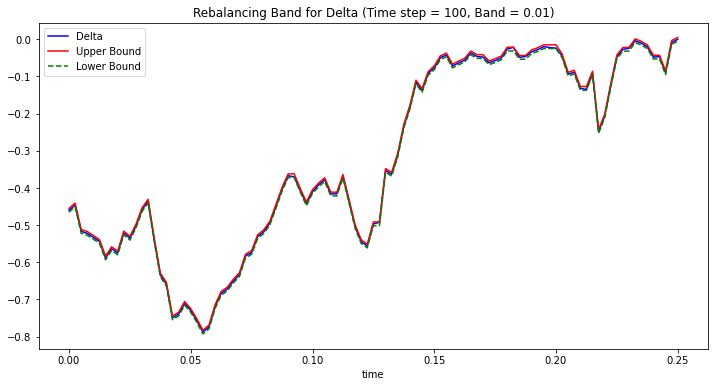

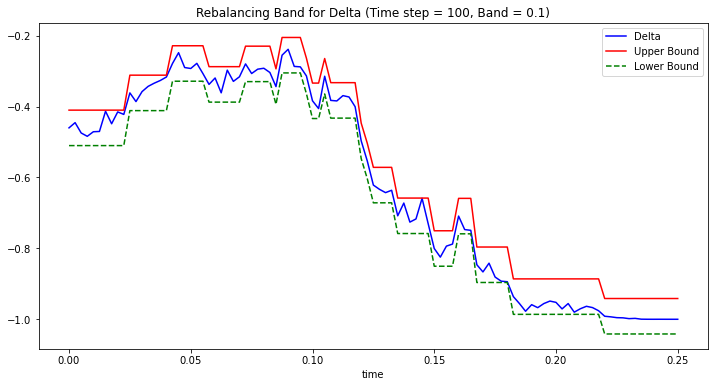

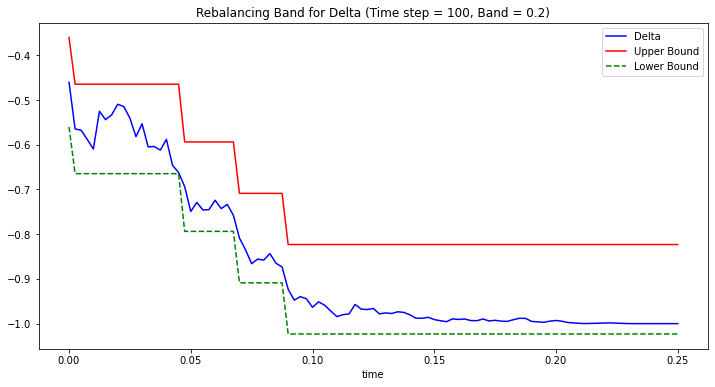

In [316]:
PnL =move_delta_hedging (100, K, tau, s0, r, sigma, mu, 0.01, fee1)
PnL =move_delta_hedging (100, K, tau, s0, r, sigma, mu, 0.1, fee1)
PnL =move_delta_hedging (100, K, tau, s0, r, sigma, mu, 0.2, fee1)

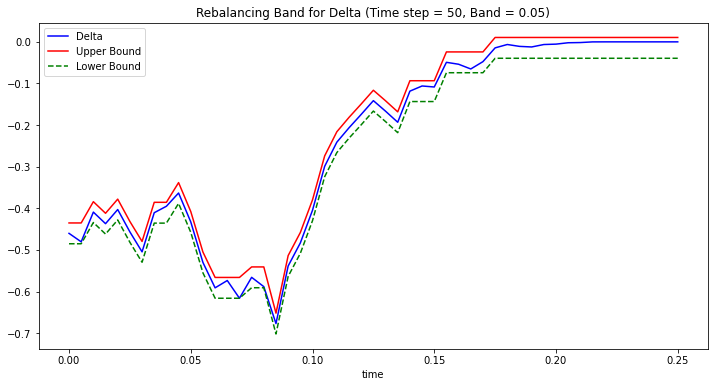

In [314]:
PnL =move_delta_hedging (100, K, tau, s0, r, sigma, mu, 0.1, fee1)

In [138]:
np.mean(PnL)

-0.039427762535953335

(-5.0, 8.0)

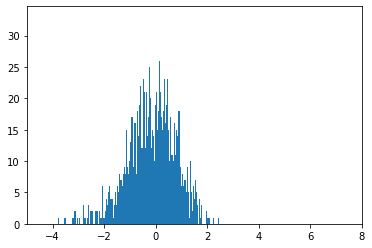

In [139]:
# portfolio value at maturity
N_sim = 5000
profit = np.zeros(N_sim)
for i in np.arange (N_sim):
    profit[i] = move_delta_hedging (10, K, tau, s0, r, sigma, mu, band, fee1)[10]
plt.hist(profit, bins=1000)
plt.xlim(-5,8)

In [140]:
np.mean(profit)

-0.17696128222420826

# Plot and Numerical summary - move delta

In [249]:
# portfolio value at maturity
N_sim = 5000
reb = 100
mprofit1 = np.zeros(N_sim)
mprofit2 = np.zeros(N_sim) #base case
mprofit3 = np.zeros(N_sim)
mprofit4 = np.zeros(N_sim)
mprofit5 = np.zeros(N_sim)
mprofit6 = np.zeros(N_sim)
mprofit7 = np.zeros(N_sim)
mprofit8 = np.zeros(N_sim)
for i in np.arange (N_sim):
    # transaction cost
    mprofit1[i] = move_delta_hedging (reb, K, tau, s0, r, sigma, mu, band,0)[reb]
    mprofit2[i] = move_delta_hedging (reb, K, tau, s0, r, sigma, mu, band,fee1)[reb] #base case fee1=0.005
    mprofit3[i] = move_delta_hedging (reb, K, tau, s0, r, sigma, mu, band,fee1*10)[reb]
    #time steps
    mprofit4[i] = move_delta_hedging (10, K, tau, s0, r, sigma, mu, band,fee1)[10]
    #profit2[i] = time_delta_hedging (reb, K, tau, s0, r, sigma, mu, band,fee1)[reb]
    mprofit5[i] = move_delta_hedging (300, K, tau, s0, r, sigma, mu, band,fee1)[300]
    #volatility
    mprofit6[i] = move_delta_hedging (reb, K, tau, s0, r, 0.1, mu, band,fee1)[reb]
    mprofit7[i] = move_delta_hedging (reb, K, tau, s0, r, 0.3, mu, band,fee1)[reb]
    mprofit8[i] = move_delta_hedging (reb, K, tau, s0, r, 0.4, mu, band,fee1)[reb]


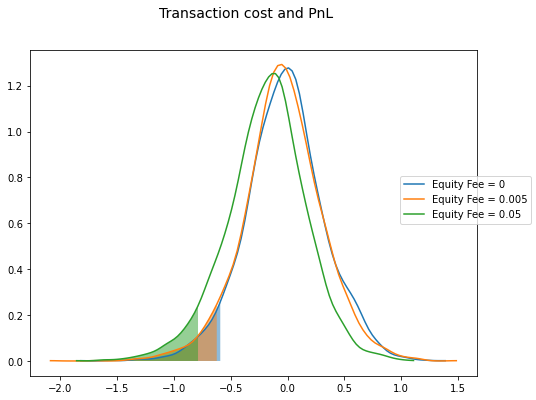

In [252]:
# Transaction cost and PnL - move delta
fig = plt.figure(figsize=(8,6))
pnl_plot(mprofit1)
pnl_plot(mprofit2)
pnl_plot(mprofit3)
fig.suptitle('Transaction cost and PnL', fontsize=14)
fig.legend(labels=['Equity Fee = 0','Equity Fee = 0.005','Equity Fee = 0.05'],loc='center right')

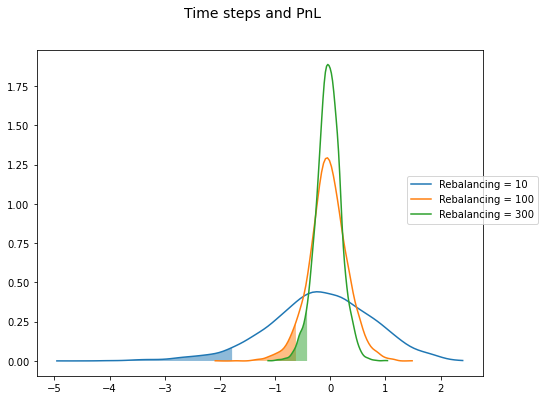

In [253]:
#time steps and PnL - move delta
fig = plt.figure(figsize=(8,6))
pnl_plot(mprofit4)
pnl_plot(mprofit2)
pnl_plot(mprofit5)
fig.suptitle('Time steps and PnL', fontsize=14)
fig.legend(labels=['Rebalancing = 10','Rebalancing = 100','Rebalancing = 300'],loc='center right')

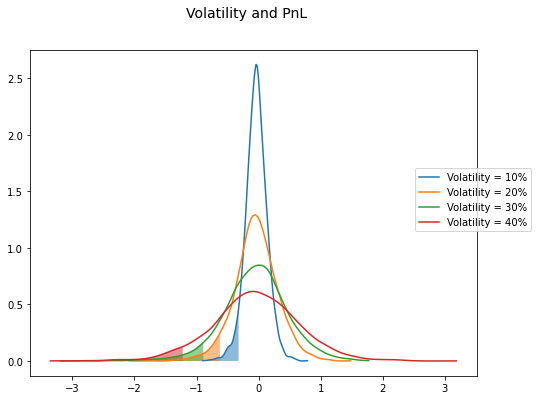

In [254]:
#volatility and PnL - move delta
fig = plt.figure(figsize=(8,6))
pnl_plot(mprofit6)
pnl_plot(mprofit2)
pnl_plot(mprofit7)
pnl_plot(mprofit8)
fig.suptitle('Volatility and PnL', fontsize=14)
fig.legend(labels=['Volatility = 10%','Volatility = 20%','Volatility = 30%','Volatility = 40%'],loc='center right')

In [255]:
#numerical summary
pnl_summary(mprofit1)
pnl_summary(mprofit2)
pnl_summary(mprofit3)
pnl_summary(mprofit4)
pnl_summary(mprofit5)
pnl_summary(mprofit6)
pnl_summary(mprofit7)
pnl_summary(mprofit8)


Mean=-0.02268, Std=0.34634, VaR=-0.59177, CVaR=-0.78448, skewness=-0.09454, kurtosis=0.72019
Mean=-0.04215, Std=0.34997, VaR=-0.62255, CVaR=-0.82824, skewness=-0.13739, kurtosis=1.01566
Mean=-0.18738, Std=0.35285, VaR=-0.78757, CVaR=-0.99476, skewness=-0.26125, kurtosis=0.71983
Mean=-0.18150, Std=0.94660, VaR=-1.77986, CVaR=-2.40718, skewness=-0.43571, kurtosis=0.66289
Mean=-0.03770, Std=0.22701, VaR=-0.42028, CVaR=-0.54910, skewness=-0.14357, kurtosis=0.87918
Mean=-0.03844, Std=0.17441, VaR=-0.32239, CVaR=-0.43607, skewness=-0.16096, kurtosis=1.26414
Mean=-0.04876, Std=0.52162, VaR=-0.89120, CVaR=-1.26100, skewness=-0.33545, kurtosis=1.57341
Mean=-0.04842, Std=0.69998, VaR=-1.22227, CVaR=-1.58931, skewness=-0.09506, kurtosis=0.85174


# Time-based Delta-Gamma Hedging

In [363]:
def time_delta_gamma_hedging (rebal, K, tau, s0, r, sigma, mu, fee1,fee2,tau_call,sigma_p=sigma):
    #vector
    P=np.zeros(rebal+1) #portflio value* 
    Vp=np.zeros(rebal+1) # put opotion value 
    Vc=np.zeros(rebal+1) # call opotion value
    Alpha=np.zeros(rebal+1) # asset share number 
    beta=np.zeros(rebal+1) # call option share number
    ops_hold = np.zeros(rebal+1) #call option holding
    
    B=np.zeros(rebal+1) # bank account* 
    S=np.zeros(rebal+1) #asset price* 
    Hold=np.zeros(rebal+1) # stock holding* 
    Cost=np.zeros(rebal+1) # transaction cost
    t=np.zeros(rebal+1) #time
    # initial values:
    P[0]=0
    S[0]= s0
    Vp[0]=f_put(K, tau, s0, r, sigma)
    Vc[0]=f_call(K, tau_call, s0, r, sigma)
    
    delta_p = delta_put(K, tau, s0, r, sigma)
    delta_c = delta_call(K, tau_call, s0, r, sigma)
    gamma_p = gamma(K, tau, s0, r, sigma)
    gamma_c = gamma(K, tau_call, s0, r, sigma)
    
    beta[0] = gamma_p/gamma_c
    Alpha[0]= delta_p - beta[0]*delta_c
    Cost[0]=fee1*abs(Alpha[0])+fee2*(1+abs(beta[0]))
    B[0]=Vp[0]-Alpha[0]*s0-Vc[0]*beta[0]-Cost[0]
    Hold[0]=Alpha[0]*S[0]
    ops_hold[0] = beta[0]*Vc[0]
    t[0]=0
    
    T=tau # time to maturity - put
    T_call = tau_call # time to maturity - call
    delt = T/rebal
    for i in np.arange(1,rebal+1):
        S[i]=S[i-1]*np.exp((mu-sigma_p**2/2)*delt+sigma_p*np.random.normal(0,1)*np.sqrt(delt))
        Vp[i]=f_put(K, T-(i-1)*delt, S[i], r, sigma)
        Vc[i]=f_call(K, T_call-(i-1)*delt, S[i], r, sigma)
        
        delta_p = delta_put(K, T-(i-1)*delt, S[i], r, sigma)
        delta_c = delta_call(K, T_call-(i-1)*delt, S[i], r, sigma)
        gamma_p = gamma(K, T-(i-1)*delt, S[i], r, sigma)
        gamma_c = gamma(K, T_call-(i-1)*delt, S[i], r, sigma)
        # no rebalancing at T, so simply liquidate portfolio 
        if i ==rebal+1:
            beta[i]=beta[i-1] 
            Alpha[i]=Alpha[i-1] 
        else:
            beta[i] = gamma_p/gamma_c
            Alpha[i]= delta_p - beta[i]*delta_c
            
        Hold[i]=Alpha[i]*S[i]
        ops_hold[i] = Vc[i]*beta[i]
        Cost[i]= fee1*abs(Alpha[i]-Alpha[i-1])+fee2*abs(beta[i]-beta[i-1]) # transaction cost of equity
        B[i]=np.exp(r*delt)*B[i-1]-S[i]*(Alpha[i]-Alpha[i-1])-Vc[i]*(beta[i]-beta[i-1])-Cost[i]
        P[i]=-Vp[i]+Alpha[i]*S[i]+Vc[i]*beta[i]+B[i]
        
        t[i]=t[i-1]+delt
    
    #plot
    #fig, aix = plt.subplots(figsize=(12,6))
    #aix.plot(t, S, '-b', label='Stock price')
    #aix.plot(t, B, '--r', label='Bank account') 
    #aix.plot(t, Hold, '--g', label='Stock holding') 
    #aix.plot(t, ops_hold, 'black', label='call option holding')
    #aix.plot(t, P, '-', label='Portfolio value') 
    #aix.set_xlabel('time', fontsize=10)
    #aix.set_title ("Number of rebalancing = "+str(rebal)) 
    #leg = aix.legend(loc = 'best') 
    
    #PnL = P[rebal]
    return P 

In [364]:
PnL=time_delta_gamma_hedging (1000, K, tau, s0, r, sigma, mu, fee1,fee2,tau_call)

In [365]:
np.mean(PnL)

-0.12703342870244652

In [145]:
# portfolio value at maturity
N_sim = 5000
profit = np.zeros(N_sim)
for i in np.arange (N_sim):
    profit[i] = time_delta_gamma_hedging (10, K, tau, s0, r, sigma, mu, fee1,fee2,tau_call)[10]
np.mean(profit)

0.003468085423271143

(-1.0, 1.0)

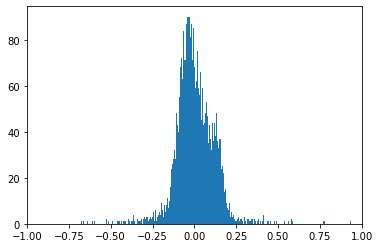

In [146]:
plt.hist(profit, bins=1000)
plt.xlim(-1,1)

# Plot and Numerical summary - time delta gamma

In [250]:
# portfolio value at maturity
N_sim = 5000
reb = 100
profit1g = np.zeros(N_sim)
profit2g = np.zeros(N_sim) #base case
profit3g = np.zeros(N_sim)
profit4g = np.zeros(N_sim)
profit5g = np.zeros(N_sim)
profit6g = np.zeros(N_sim)
profit7g = np.zeros(N_sim)
profit8g = np.zeros(N_sim)
for i in np.arange (N_sim):
    # transaction cost
    profit1g[i] = time_delta_gamma_hedging (reb, K, tau, s0, r, sigma, mu, 0,0,tau_call)[reb]
    profit2g[i] = time_delta_gamma_hedging (reb, K, tau, s0, r, sigma, mu, fee1,fee2,tau_call)[reb] #base case fee1=0.005
    profit3g[i] = time_delta_gamma_hedging (reb, K, tau, s0, r, sigma, mu, fee1*10,fee2*10,tau_call)[reb]
    #time steps
    profit4g[i] = time_delta_gamma_hedging (10, K, tau, s0, r, sigma, mu, fee1,fee2,tau_call)[10]
    #profit2[i] = time_delta_gamma_hedging (reb, K, tau, s0, r, sigma, mu, fee1,fee2,tau_call)[reb]
    profit5g[i] = time_delta_gamma_hedging (300, K, tau, s0, r, sigma, mu, fee1,fee2,tau_call)[300]
    #volatility
    profit6g[i] = time_delta_gamma_hedging (reb, K, tau, s0, r, 0.1, mu, fee1,fee2,tau_call)[reb]
    profit7g[i] = time_delta_gamma_hedging (reb, K, tau, s0, r, 0.3, mu, fee1,fee2,tau_call)[reb]
    profit8g[i] = time_delta_gamma_hedging (reb, K, tau, s0, r, 0.4, mu, fee1,fee2,tau_call)[reb]


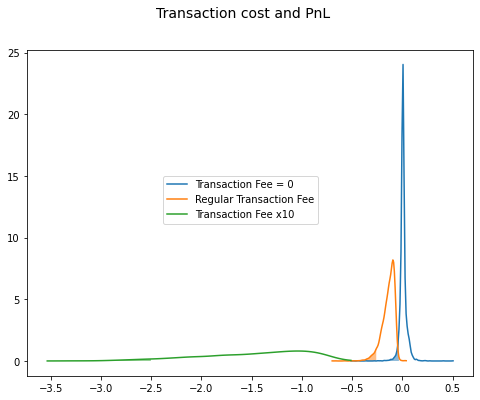

In [267]:
# Transaction cost and PnL - move delta
fig = plt.figure(figsize=(8,6))
pnl_plot(profit1g)
pnl_plot(profit2g)
pnl_plot(profit3g)
fig.suptitle('Transaction cost and PnL', fontsize=14)
fig.legend(labels=['Transaction Fee = 0','Regular Transaction Fee','Transaction Fee x10'],loc='center')


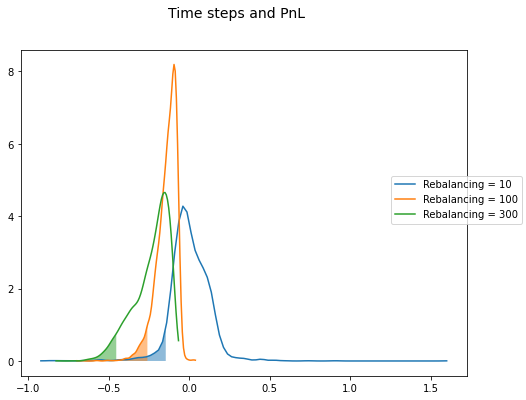

In [257]:
#time steps and PnL - move delta
fig = plt.figure(figsize=(8,6))
pnl_plot(profit4g)
pnl_plot(profit2g)
pnl_plot(profit5g)
fig.suptitle('Time steps and PnL', fontsize=14)
fig.legend(labels=['Rebalancing = 10','Rebalancing = 100','Rebalancing = 300'],loc='center right')


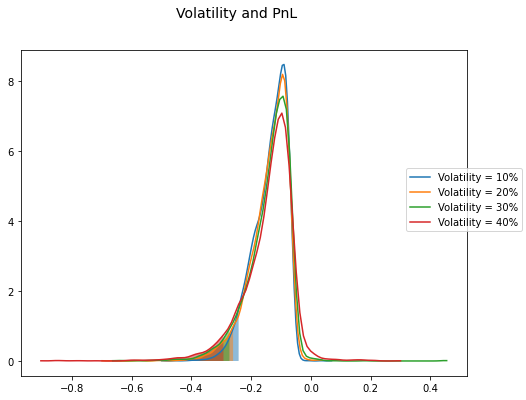

In [258]:
#volatility and PnL - move delta
fig = plt.figure(figsize=(8,6))
pnl_plot(profit6g)
pnl_plot(profit2g)
pnl_plot(profit7g)
pnl_plot(profit8g)
fig.suptitle('Volatility and PnL', fontsize=14)
fig.legend(labels=['Volatility = 10%','Volatility = 20%','Volatility = 30%','Volatility = 40%'],loc='center right')


In [259]:
#numerical summary
pnl_summary(profit1g)
pnl_summary(profit2g)
pnl_summary(profit3g)
pnl_summary(profit4g)
pnl_summary(profit5g)
pnl_summary(profit6g)
pnl_summary(profit7g)
pnl_summary(profit8g)

Mean=0.00698, Std=0.03659, VaR=-0.03521, CVaR=-0.07497, skewness=-1.15396, kurtosis=40.81374
Mean=-0.14032, Std=0.06394, VaR=-0.26063, CVaR=-0.31416, skewness=-1.49191, kurtosis=4.59991
Mean=-1.46622, Std=0.54309, VaR=-2.50295, CVaR=-2.73148, skewness=-0.69151, kurtosis=-0.16158
Mean=0.00294, Std=0.12165, VaR=-0.14654, CVaR=-0.27184, skewness=0.08709, kurtosis=13.39287
Mean=-0.23533, Std=0.11032, VaR=-0.45412, CVaR=-0.50829, skewness=-0.95727, kurtosis=0.42583
Mean=-0.13779, Std=0.05600, VaR=-0.24213, CVaR=-0.27666, skewness=-0.95546, kurtosis=1.08994
Mean=-0.14032, Std=0.07114, VaR=-0.27287, CVaR=-0.33388, skewness=-1.23327, kurtosis=5.93786
Mean=-0.14197, Std=0.08488, VaR=-0.29288, CVaR=-0.37749, skewness=-1.69687, kurtosis=8.50136


# Move-based Delta-Gamma Hedging

In [366]:
def move_delta_gamma_hedging (rebal, K, tau, s0, r, sigma, mu, band, fee1,fee2,tau_call,sigma_p=sigma):
    #vector
    P=np.zeros(rebal+1) #portflio value* 
    Vp=np.zeros(rebal+1) # put opotion value 
    Vc=np.zeros(rebal+1) # call opotion value
    Alpha=np.zeros(rebal+1) # asset share number 
    beta=np.zeros(rebal+1) # call option share number
    
    B=np.zeros(rebal+1) # bank account* 
    S=np.zeros(rebal+1) #asset price* 
    Hold=np.zeros(rebal+1) # stock holding* 
    ops_hold=np.zeros(rebal+1) #call option holding
    Cost=np.zeros(rebal+1) # transaction cost
    t=np.zeros(rebal+1) #time
    
    # initial values:
    P[0]=0
    S[0]= s0
    Vp[0]=f_put(K, tau, s0, r, sigma)
    Vc[0]=f_call(K, tau_call, s0, r, sigma)
    
    
    delta_p = delta_put(K, tau, s0, r, sigma)
    delta_c = delta_call(K, tau_call, s0, r, sigma)
    gamma_p = gamma(K, tau, s0, r, sigma)
    gamma_c = gamma(K, tau_call, s0, r, sigma)
    
    beta[0] = gamma_p/gamma_c
    Alpha[0]= delta_p - beta[0]*delta_c # alpha represent the overall portfolio delta
    ub = Alpha[0]+0.5*band
    lb = Alpha[0]-0.5*band
    Cost[0]=fee1*abs(Alpha[0])+fee2*(1+abs(beta[0]))
    B[0]=Vp[0]-Alpha[0]*s0-Vc[0]*beta[0]-Cost[0]
    Hold[0]=Alpha[0]*S[0]
    ops_hold[0] = Vc[0]*beta[0]
    t[0]=0
    
 #track portfolio delta
    delta_portfolio = np.zeros(rebal+1)
    delta_portfolio[0]=Alpha[0]
 #track put option delta
    delta_p = np.zeros(rebal+1)
    delta_p[0] = delta_put(K, tau, s0, r, sigma)
    
    T=tau # time to maturity - put
    T_call = tau_call # time to maturity - call
    delt = T/rebal
    for i in np.arange(1,rebal+1):
        S[i]=S[i-1]*np.exp((mu-sigma_p**2/2)*delt+sigma_p*np.random.normal(0,1)*np.sqrt(delt))
        Vp[i]=f_put(K, T-(i-1)*delt, S[i], r, sigma)
        Vc[i]=f_call(K, T_call-(i-1)*delt, S[i], r, sigma)
        
        #delta_p = delta_put(K, T-(i-1)*delt, S[i], r, sigma)
        delta_p[i] = delta_put(K, T-(i-1)*delt, S[i], r, sigma)
        delta_c = delta_call(K, T_call-(i-1)*delt, S[i], r, sigma)
        gamma_p = gamma(K, T-(i-1)*delt, S[i], r, sigma)
        gamma_c = gamma(K, T_call-(i-1)*delt, S[i], r, sigma)
        # no rebalancing at T, so simply liquidate portfolio 
        if i ==rebal+1:
            beta[i]=beta[i-1] 
            Alpha[i]=Alpha[i-1] 
        else:
            #delta_portfolio = delta_p - gamma_p/gamma_c*delta_c
            delta_portfolio[i] = delta_p[i] - gamma_p/gamma_c*delta_c
            #keep current position until the telta of option has changed significantly large
            #if delta_portfolio<ub and delta_portfolio>lb:
            if delta_portfolio[i]<ub and delta_portfolio[i]>lb:
                beta[i]=beta[i-1]
                Alpha[i] = Alpha[i-1]
            else:
                beta[i] = gamma_p/gamma_c
                #Alpha[i]= delta_portfolio
                Alpha[i]= delta_portfolio[i]
                #reset bound after rebalancing
                ub = Alpha[i]+0.5*band
                lb = Alpha[i]-0.5*band
            
        Hold[i]=Alpha[i]*S[i]
        ops_hold[i] = Vc[i]*beta[i]
        Cost[i]= fee1*abs(Alpha[i]-Alpha[i-1])+fee2*abs(beta[i]-beta[i-1]) # transaction cost of equity
        B[i]=np.exp(r*delt)*B[i-1]-S[i]*(Alpha[i]-Alpha[i-1])-Vc[i]*(beta[i]-beta[i-1])-Cost[i]
        P[i]=-Vp[i]+Alpha[i]*S[i]+Vc[i]*beta[i]+B[i]
        
        t[i]=t[i-1]+delt
    
    #plot
    #fig, aix = plt.subplots(figsize=(12,6))
    #aix.plot(t, delta_portfolio, '-b', label='Portfolio Delta')
    #aix.plot(t, delta_p, '-', label='Put Delta')
    #aix.plot(t, beta, '-', label='Relative Gamma')
    #aix.plot(t, Alpha+0.5*band, '-r', label='Upper Bound')
    #aix.plot(t, Alpha-0.5*band, '--g', label='Lower Bound')
    
   #aix.plot(t, S, '-b', label='Stock price')
   #aix.plot(t, B, '--r', label='Bank account') 
   #aix.plot(t, Hold, '--g', label='Stock holding') 
   #aix.plot(t, P, '-', label='Portfolio value') 
    #aix.set_xlabel('time', fontsize=10)
    #aix.set_title ("Number of rebalancing = "+str(rebal)) 
    #aix.set_title ("Rebalancing Band for Delta-Gamma (Time step = " +str(rebal)+", Band = "+str(band)+")")
    #leg = aix.legend(loc = 'best')    
   #PnL = B[rebal]+Hold[rebal]-V[rebal]
    return P #PnL 

In [367]:
PnL=move_delta_gamma_hedging (1000, K, tau, s0, r, sigma, mu, band, fee1,fee2,tau_call)
np.mean(PnL)

-0.08918316001146727

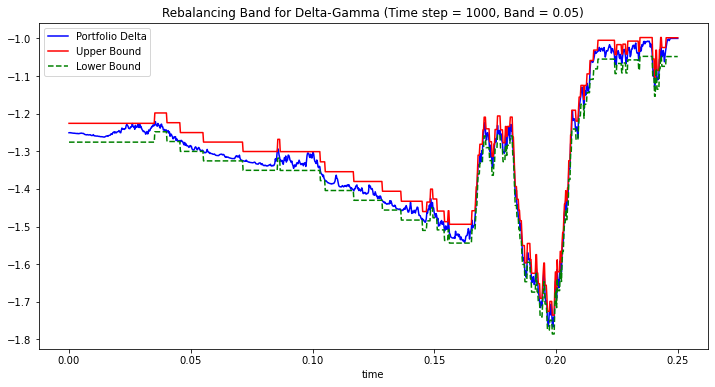

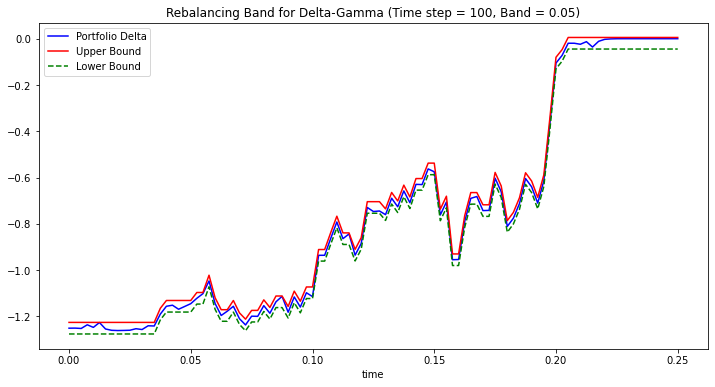

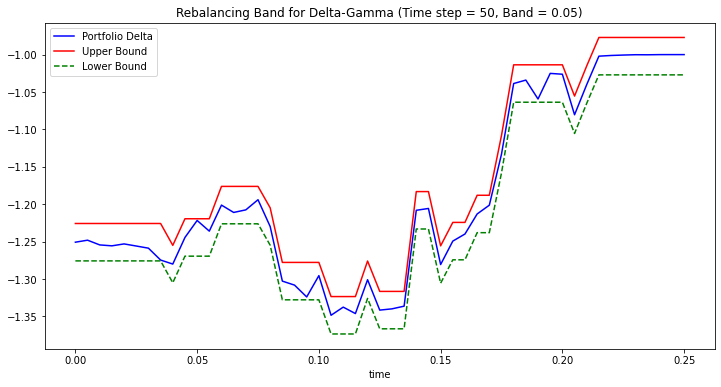

In [356]:
PnL=move_delta_gamma_hedging (1000, K, tau, s0, r, sigma, mu, band, fee1,fee2,tau_call)
PnL=move_delta_gamma_hedging (100, K, tau, s0, r, sigma, mu, band, fee1,fee2,tau_call)
PnL=move_delta_gamma_hedging (50, K, tau, s0, r, sigma, mu, band, fee1,fee2,tau_call)
#plt.hist(PnL, bins=1000)

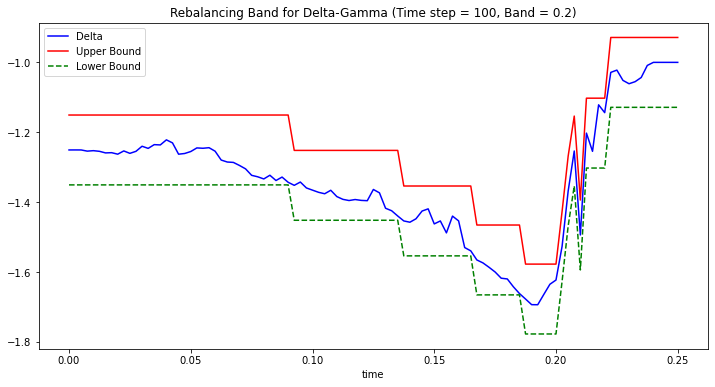

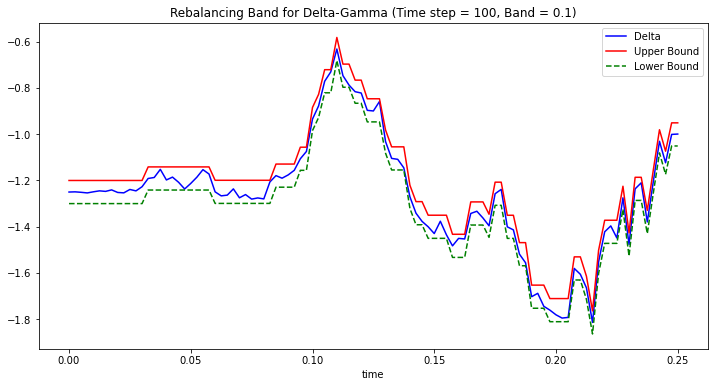

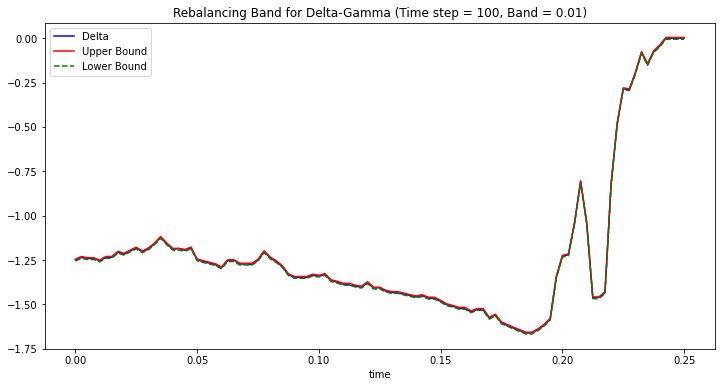

In [338]:
PnL=move_delta_gamma_hedging (100, K, tau, s0, r, sigma, mu, 0.2, fee1,fee2,tau_call)
PnL=move_delta_gamma_hedging (100, K, tau, s0, r, sigma, mu, 0.1, fee1,fee2,tau_call)
PnL=move_delta_gamma_hedging (100, K, tau, s0, r, sigma, mu, 0.01, fee1,fee2,tau_call)

In [322]:
np.mean(PnL)

-0.034650803270596116

In [151]:
# portfolio value at maturity
N_sim = 5000
profit = np.zeros(N_sim)
for i in np.arange (N_sim):
    profit[i] = move_delta_gamma_hedging (10, K, tau, s0, r, sigma, mu, band, fee1,fee2,tau_call)[10]

# Plot and Numerical summary - move delta gamma

In [251]:
# portfolio value at maturity
N_sim = 5000
reb = 100
mprofit1g = np.zeros(N_sim)
mprofit2g = np.zeros(N_sim) #base case
mprofit3g = np.zeros(N_sim)
mprofit4g = np.zeros(N_sim)
mprofit5g = np.zeros(N_sim)
mprofit6g = np.zeros(N_sim)
mprofit7g = np.zeros(N_sim)
mprofit8g = np.zeros(N_sim)
for i in np.arange (N_sim):
    # transaction cost
    mprofit1g[i] = move_delta_gamma_hedging (reb, K, tau, s0, r, sigma, mu, band,0,0,tau_call)[reb]
    mprofit2g[i] = move_delta_gamma_hedging (reb, K, tau, s0, r, sigma, mu, band,fee1,fee2,tau_call)[reb] #base case fee1=0.005
    mprofit3g[i] = move_delta_gamma_hedging (reb, K, tau, s0, r, sigma, mu, band,fee1*10,fee2*10,tau_call)[reb]
    #time steps
    mprofit4g[i] = move_delta_gamma_hedging (10, K, tau, s0, r, sigma, mu, band,fee1,fee2,tau_call)[10]
    #profit2g[i] = move_delta_gamma_hedging (reb, K, tau, s0, r, sigma, mu, band,fee1,fee2,tau_call)[reb]
    mprofit5g[i] = move_delta_gamma_hedging (300, K, tau, s0, r, sigma, mu, band,fee1,fee2,tau_call)[300]
    #volatility
    mprofit6g[i] = move_delta_gamma_hedging (reb, K, tau, s0, r, 0.1, mu, band,fee1,fee2,tau_call)[reb]
    mprofit7g[i] = move_delta_gamma_hedging (reb, K, tau, s0, r, 0.3, mu, band,fee1,fee2,tau_call)[reb]
    mprofit8g[i] = move_delta_gamma_hedging (reb, K, tau, s0, r, 0.4, mu, band,fee1,fee2,tau_call)[reb]


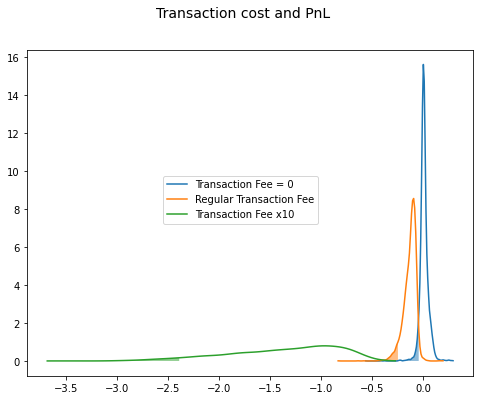

In [266]:
# Transaction cost and PnL - move delta
fig = plt.figure(figsize=(8,6))
pnl_plot(mprofit1g)
pnl_plot(mprofit2g)
pnl_plot(mprofit3g)
fig.suptitle('Transaction cost and PnL', fontsize=14)
fig.legend(labels=['Transaction Fee = 0','Regular Transaction Fee','Transaction Fee x10'],loc='center')


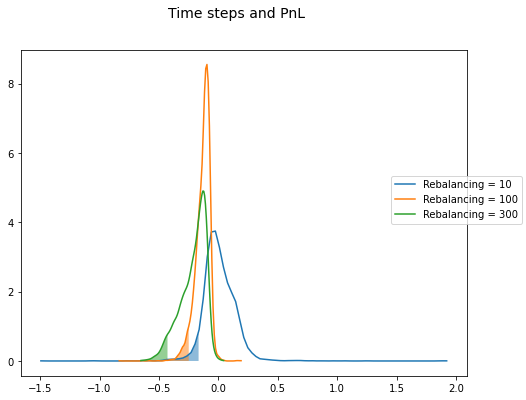

In [261]:
#time steps and PnL - move delta
fig = plt.figure(figsize=(8,6))
pnl_plot(mprofit4g)
pnl_plot(mprofit2g)
pnl_plot(mprofit5g)
fig.suptitle('Time steps and PnL', fontsize=14)
fig.legend(labels=['Rebalancing = 10','Rebalancing = 100','Rebalancing = 300'],loc='center right')


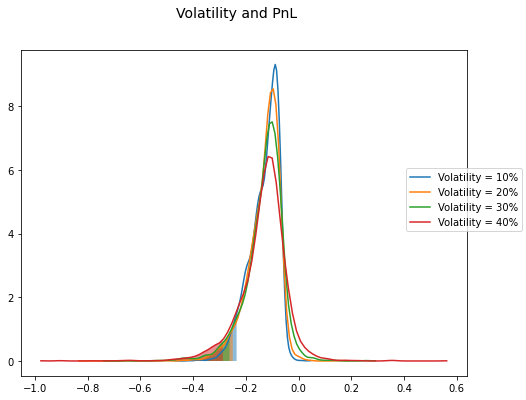

In [262]:
#volatility and PnL - move delta
fig = plt.figure(figsize=(8,6))
pnl_plot(mprofit6g)
pnl_plot(mprofit2g)
pnl_plot(mprofit7g)
pnl_plot(mprofit8g)
fig.suptitle('Volatility and PnL', fontsize=14)
fig.legend(labels=['Volatility = 10%','Volatility = 20%','Volatility = 30%','Volatility = 40%'],loc='center right')


In [263]:
#numerical summary
pnl_summary(mprofit1g)
pnl_summary(mprofit2g)
pnl_summary(mprofit3g)
pnl_summary(mprofit4g)
pnl_summary(mprofit5g)
pnl_summary(mprofit6g)
pnl_summary(mprofit7g)
pnl_summary(mprofit8g)

Mean=0.00684, Std=0.04149, VaR=-0.04653, CVaR=-0.08245, skewness=-0.40921, kurtosis=16.37306
Mean=-0.13173, Std=0.06196, VaR=-0.24957, CVaR=-0.29772, skewness=-1.43273, kurtosis=6.49575
Mean=-1.36434, Std=0.54349, VaR=-2.38893, CVaR=-2.62511, skewness=-0.68048, kurtosis=-0.11863
Mean=0.00667, Std=0.13708, VaR=-0.16664, CVaR=-0.26542, skewness=1.15401, kurtosis=23.38957
Mean=-0.21122, Std=0.10823, VaR=-0.42827, CVaR=-0.47709, skewness=-0.89952, kurtosis=0.30780
Mean=-0.13050, Std=0.05499, VaR=-0.23508, CVaR=-0.26691, skewness=-0.95097, kurtosis=0.92373
Mean=-0.13050, Std=0.07269, VaR=-0.26194, CVaR=-0.32796, skewness=-1.20958, kurtosis=5.06792
Mean=-0.13327, Std=0.08902, VaR=-0.28732, CVaR=-0.36892, skewness=-1.16587, kurtosis=8.60161


# Effect of real world volatility

In [283]:
# real world volatility lower than risk-neutral volatility
N_sim = 5000
reb =100
profit9 = np.zeros(N_sim)
mprofit9 = np.zeros(N_sim)
profit9g = np.zeros(N_sim)
mprofit9g = np.zeros(N_sim)
for i in np.arange (N_sim):
    profit9[i] = time_delta_hedging (reb, K, tau, s0, r, sigma, mu, fee1,0.15)[reb]
    mprofit9[i] = move_delta_hedging (reb, K, tau, s0, r, sigma, mu, band,fee1,0.15)[reb]
    profit9g[i] = time_delta_gamma_hedging (reb, K, tau, s0, r, sigma, mu, fee1,fee2,tau_call,0.15)[reb]
    mprofit9g[i] = move_delta_gamma_hedging (reb, K, tau, s0, r, sigma, mu, band,fee1,fee2,tau_call,0.15)[reb]

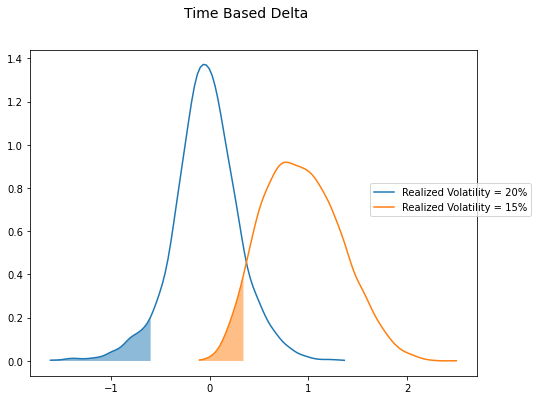

In [285]:
# realized volatility and PnL 
fig = plt.figure(figsize=(8,6))
pnl_plot(profit2)
pnl_plot(profit9)
fig.suptitle('Time Based Delta', fontsize=14)
fig.legend(labels=['Realized Volatility = 20%','Realized Volatility = 15%'],loc='center right')

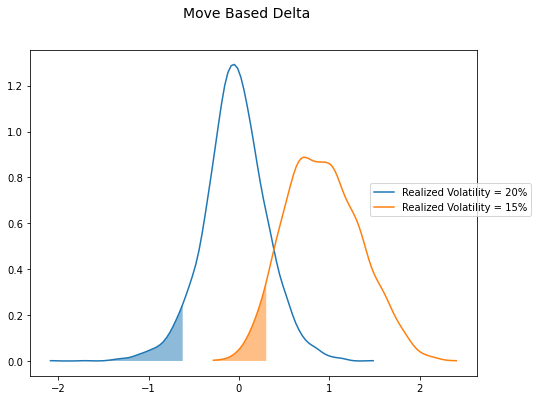

In [286]:
fig = plt.figure(figsize=(8,6))
pnl_plot(mprofit2)
pnl_plot(mprofit9)
fig.suptitle('Move Based Delta', fontsize=14)
fig.legend(labels=['Realized Volatility = 20%','Realized Volatility = 15%'],loc='center right')

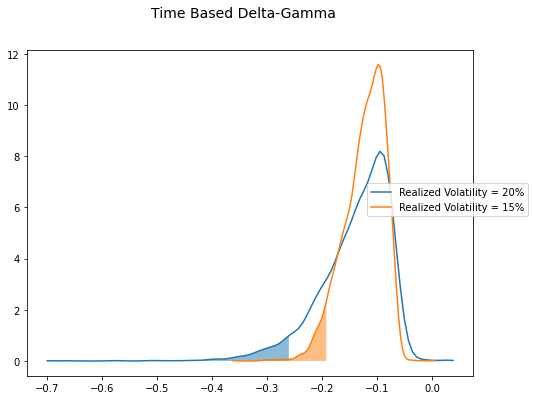

In [287]:
fig = plt.figure(figsize=(8,6))
pnl_plot(profit2g)
pnl_plot(profit9g)
fig.suptitle('Time Based Delta-Gamma', fontsize=14)
fig.legend(labels=['Realized Volatility = 20%','Realized Volatility = 15%'],loc='center right')

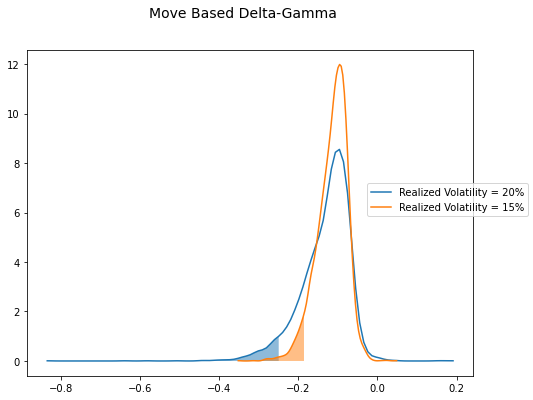

In [288]:
fig = plt.figure(figsize=(8,6))
pnl_plot(mprofit2g)
pnl_plot(mprofit9g)
fig.suptitle('Move Based Delta-Gamma', fontsize=14)
fig.legend(labels=['Realized Volatility = 20%','Realized Volatility = 15%'],loc='center right')

In [290]:
pnl_summary(profit9)
pnl_summary(mprofit9)
pnl_summary(profit9g)
pnl_summary(mprofit9g)

Mean=0.93696, Std=0.39330, VaR=0.34303, CVaR=0.23891, skewness=0.29152, kurtosis=-0.34943
Mean=0.93235, Std=0.41340, VaR=0.30158, CVaR=0.17187, skewness=0.23819, kurtosis=-0.33751
Mean=-0.12386, Std=0.03754, VaR=-0.19270, CVaR=-0.21484, skewness=-0.83449, kurtosis=0.89387
Mean=-0.11467, Std=0.03836, VaR=-0.18569, CVaR=-0.21019, skewness=-0.80465, kurtosis=1.35815


# Effect of rebalancing band for move-based strategy

In [291]:
# real world volatility lower than risk-neutral volatility
N_sim = 5000
reb =100
mprofit10 = np.zeros(N_sim)
mprofit11 = np.zeros(N_sim)
mprofit12 = np.zeros(N_sim)
mprofit10g = np.zeros(N_sim)
mprofit11g = np.zeros(N_sim)
mprofit12g = np.zeros(N_sim)
for i in np.arange (N_sim):
    mprofit10[i] = move_delta_hedging (reb, K, tau, s0, r, sigma, mu, 0.01,fee1)[reb]
    mprofit11[i] = move_delta_hedging (reb, K, tau, s0, r, sigma, mu, 0.1,fee1)[reb]
    mprofit12[i] = move_delta_hedging (reb, K, tau, s0, r, sigma, mu, 0.2,fee1)[reb]
    mprofit10g[i] = move_delta_gamma_hedging (reb, K, tau, s0, r, sigma, mu, 0.01,fee1,fee2,tau_call)[reb]
    mprofit11g[i] = move_delta_gamma_hedging (reb, K, tau, s0, r, sigma, mu, 0.1,fee1,fee2,tau_call)[reb]
    mprofit12g[i] = move_delta_gamma_hedging (reb, K, tau, s0, r, sigma, mu, 0.2,fee1,fee2,tau_call)[reb]

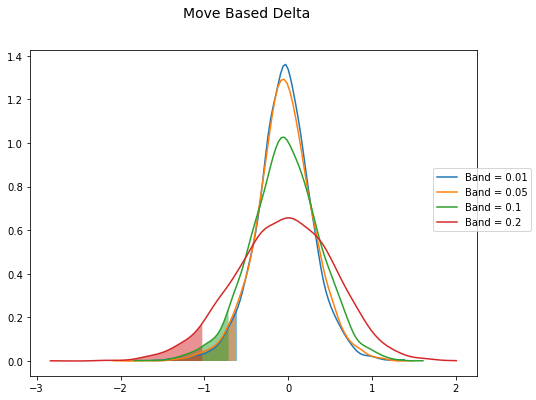

In [295]:
fig = plt.figure(figsize=(8,6))
pnl_plot(mprofit10)
pnl_plot(mprofit2)
pnl_plot(mprofit11)
pnl_plot(mprofit12)
fig.suptitle('Move Based Delta', fontsize=14)
fig.legend(labels=['Band = 0.01','Band = 0.05','Band = 0.1','Band = 0.2'],loc='center right')

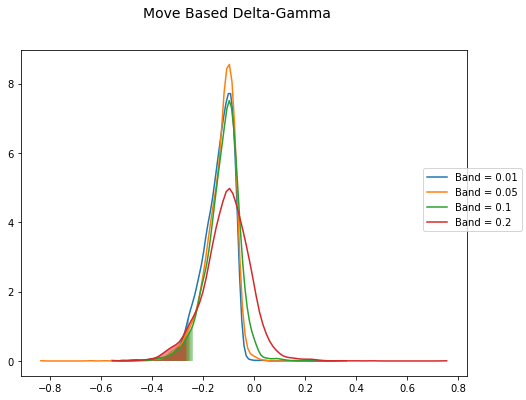

In [296]:
fig = plt.figure(figsize=(8,6))
pnl_plot(mprofit10g)
pnl_plot(mprofit2g)
pnl_plot(mprofit11g)
pnl_plot(mprofit12g)
fig.suptitle('Move Based Delta-Gamma', fontsize=14)
fig.legend(labels=['Band = 0.01','Band = 0.05','Band = 0.1','Band = 0.2'],loc='center right')

In [294]:
pnl_summary(mprofit10)
pnl_summary(mprofit11)
pnl_summary(mprofit12)
pnl_summary(mprofit10g)
pnl_summary(mprofit11g)
pnl_summary(mprofit12g)

Mean=-0.04666, Std=0.33843, VaR=-0.60952, CVaR=-0.81891, skewness=-0.15630, kurtosis=1.29213
Mean=-0.03773, Std=0.41476, VaR=-0.71099, CVaR=-0.93836, skewness=-0.10006, kurtosis=0.39648
Mean=-0.04681, Std=0.58868, VaR=-1.02431, CVaR=-1.30252, skewness=-0.14262, kurtosis=0.07074
Mean=-0.14114, Std=0.06280, VaR=-0.25509, CVaR=-0.30401, skewness=-1.10621, kurtosis=3.25505
Mean=-0.12155, Std=0.06712, VaR=-0.23945, CVaR=-0.29069, skewness=-0.64328, kurtosis=3.12903
Mean=-0.10547, Std=0.09280, VaR=-0.26443, CVaR=-0.31595, skewness=0.06461, kurtosis=2.93454
